## Problem Statement

    An online retail store is trying to understand the various customer purchase patterns for their firm, you are required to give enough evidence based insights to provide the same.

## Problem Objective

    The objective of this project is to find out patterns and insight about consumer purchasing history from the data provided that can be helpfull for an online retailer and segment the customers based on their behavior

## Data Description

There are total 8 columns/Features present in the dataset.
- Invoice : Invoice Number
- StockCode : Product Id 
- Description : Product Description
- Quantity : Quantity of the product
- InvoiceDate : Date of the invoice
- Price : Price of the product per unit
- CustomerID : CustomerID
- Country : Region of Purchase

## Data Pre-processing Steps and Inspiration

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='darkgrid')

In [29]:
data = pd.read_csv('OnlineRetail.csv',encoding= 'unicode_escape',parse_dates=['InvoiceDate'])
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Descrptive statistic of the numeric coloumns in the dataset. There are just two columns that are numeric and rest are object type. Customer_id is aunique identifier for a customer. Quantity is the number of products purchased by the customer.

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


Information of the dataset

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Null Value percentage for each column

In [33]:
round(data.isnull().sum()/data.shape[0] * 100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

Dropped all the Null values from the data and coverted customer id to string type from float.

In [35]:
data = data.dropna()
data['CustomerID'] = data['CustomerID'].astype('int64')
data['CustomerID'] = data['CustomerID'].astype('str')
data.shape

(406829, 8)

Most of the customers are from UK.

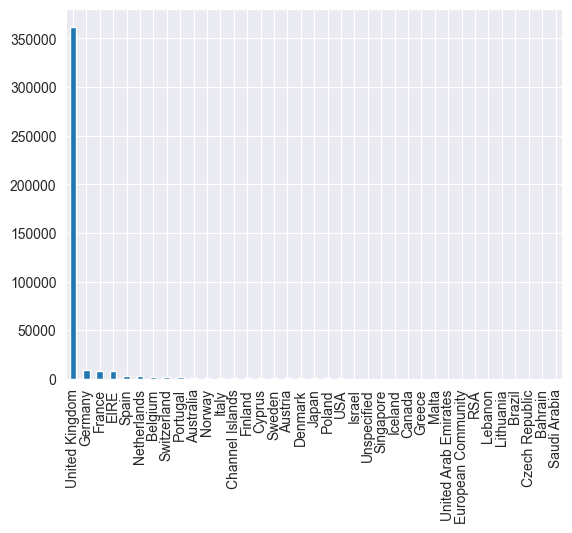

In [36]:
data.Country.value_counts().plot(kind='bar')
plt.show()

We can differentiate the customers on basis of Recency, Frequency and Amount of Sales.
- Recency : How recently the customer has bought the product.
- Frequency : How often the customer has bought products from the store.
- Amount : The total amount of purchase the customer has done till date.

The Amount per invoice can be calculated multiplying the Quantity with UnitPrice.

In [37]:
data['Amount'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


The Amount per Customer canculated using the groupby function and summing the amount basis each customer.

In [38]:
amount = data.groupby('CustomerID')['Amount'].sum()
amount = amount.reset_index()
amount.head()

,CustomerID,Amount
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


The frequency can be calculated by counting the InvoiceNo for each customer.

In [39]:
frequency = data.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


The recency can be calculated by subtracting the max date of the dataset by the Invoice date for every customer, and after that taking the minimum value will give us the recent purchase time for customer.

In [40]:
data['Diff'] = data.InvoiceDate.max() - data.InvoiceDate
recency = data.groupby('CustomerID')['Diff'].min()
recency = recency.reset_index()
recency['Diff'] = recency.Diff.dt.days

In [41]:
recency.head()

,CustomerID,Diff
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


After merging all the three different dataset we have the dataset on which we can perform the clustering

In [42]:
rfm = pd.merge(amount,frequency,on = 'CustomerID',how = 'inner')
rfm = pd.merge(rfm,recency,how = 'inner',on = 'CustomerID')
rfm = rfm.rename(columns = {'InvoiceNo' : 'Frequency','Diff' : 'Recency'})
rfm

,CustomerID,Amount,Frequency,Recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309
...,...,...,...,...
4367,18280,180.60,10,277
4368,18281,80.82,7,180
4369,18282,176.60,13,7
4370,18283,2094.88,756,3


We can check the outliers present in the data using the boxplot from seaborn and in the plot we can see that all the vairables has outliers and here for treating the outliers we will be capping the outliers to the q3 and q1 of each variable so that we don't loose any data 

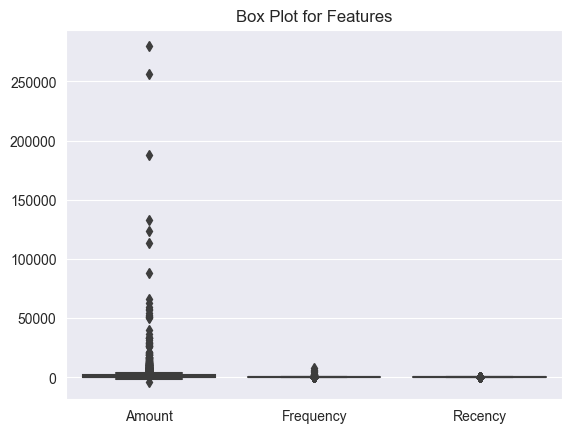

In [43]:
sns.boxplot(rfm)
plt.title('Box Plot for Features')
plt.show()

In [44]:
# Removing (statistical) outliers for Amount
def outlier(col):
    Q1 = rfm[col].quantile(0.25)
    Q3 = rfm[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    
    return upper_limit,lower_limit

# # Capping (statistical) outliers for Amount

u_amount, l_amount = outlier('Amount')


rfm.loc[rfm.Amount > u_amount,'Amount'] = u_amount
rfm.loc[rfm.Amount < l_amount,'Amount'] = l_amount

# # Capping (statistical) outliers for Recency

u_recency, l_recency = outlier('Recency')

rfm.loc[rfm.Recency > u_recency,'Recency'] = u_recency
rfm.loc[rfm.Recency < l_recency,'Recency'] = l_recency


# # Capping (statistical) outliers for Frequency
u_freq, l_freq = outlier('Frequency')

rfm.loc[rfm.Frequency > u_freq,'Frequency'] = u_freq
rfm.loc[rfm.Frequency < l_freq,'Frequency'] = l_freq

After Capping the outlier our distribution of data is like below.

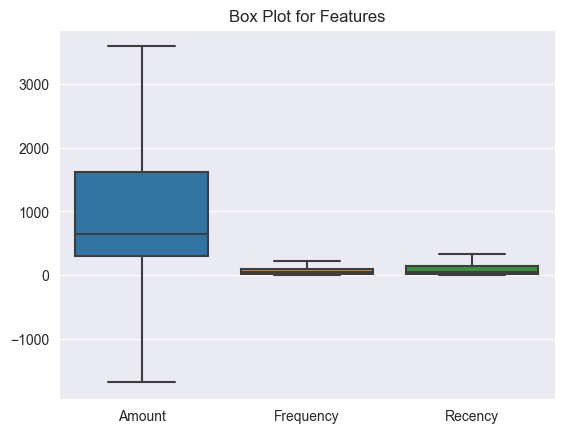

In [45]:
sns.boxplot(rfm)
plt.title('Box Plot for Features')
plt.show()

Using the Staandard Scaler we will Scale the data and bring all the variables in a single scale.

In [46]:
from sklearn.preprocessing import StandardScaler
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4372, 3)

In [47]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.999609,-0.970596,2.392915
1,2.208240,1.594564,-0.907014
2,0.606644,-0.557320,-0.163512
3,0.571172,0.041217,-0.733870
4,-0.700745,-0.756832,2.229956


## Choosing the Algorithm for the Project

As we have to segregate customer on the basis of the features we have created and the data is unlabelled so we will have to use the Unsupervised machine learning model for this task, K-means algorithm is very well suited for this as the K-means algorithm is scalable as the time complexity increases linearly with the dataset and will be fast for this dataset.

In [48]:
from sklearn.cluster import KMeans

## Assumptions

We are Assuming that there can be four clusters that can describe the data in better way and we will fit a K-means model with four clusters, and we have not considered the product category or stock availability might not effect the purchasing behavior of the customer.

In [49]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

We can check the cluster labels using the labels_ object of the model 

In [50]:
kmeans.labels_

array([2, 1, 3, ..., 0, 1, 3], dtype=int32)

## Model Evaluation and Techniques

To find the perfect n_cluster we can use the elbow method where we plot the inertia against the number of clusters
- Inertia : It is the sum of squared distances of samples to their closest cluster center.

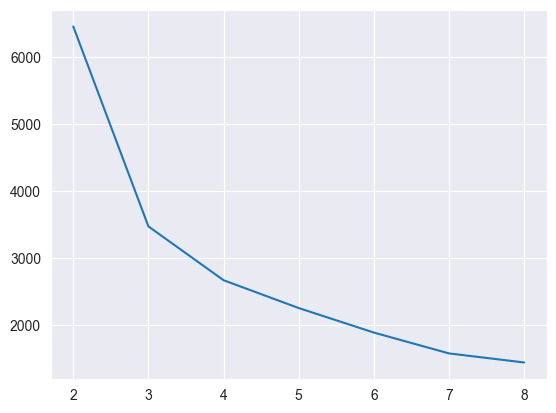

In [51]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters,ssd)
plt.show()

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
- 1: Means clusters are well apart from each other and clearly distinguished.
- 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
- -1: Means clusters are assigned in the wrong way.

In [52]:

from sklearn.metrics import silhouette_score

# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.49267328148075723
For n_clusters=3, the silhouette score is 0.5004287780103484
For n_clusters=4, the silhouette score is 0.44721355968686727
For n_clusters=5, the silhouette score is 0.4212354271121728
For n_clusters=6, the silhouette score is 0.4049203073078698
For n_clusters=7, the silhouette score is 0.40133472658330216
For n_clusters=8, the silhouette score is 0.38680898102385985


From the Silhoutte score and Elbow method we can say that number of cluster that is good fit is 3

In [61]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346,0.00000,2.0,325,2
1,12347,3589.26875,182.0,1,1
2,12348,1797.24000,31.0,74,0
3,12349,1757.55000,73.0,18,0
4,12350,334.40000,17.0,309,2


## Inferences from the Same

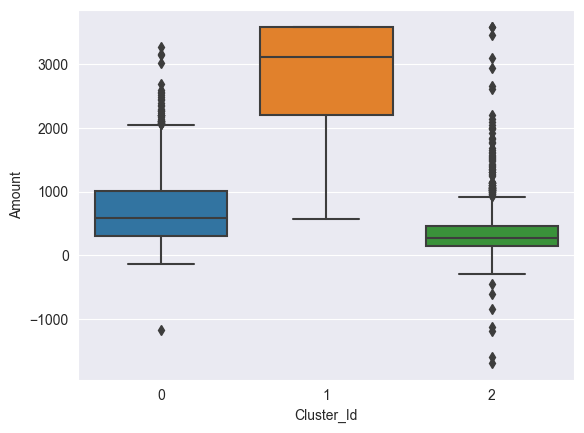

In [62]:
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)
plt.show()

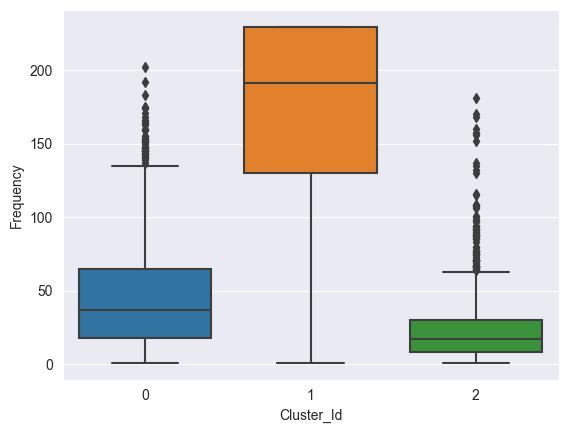

In [63]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)
plt.show()

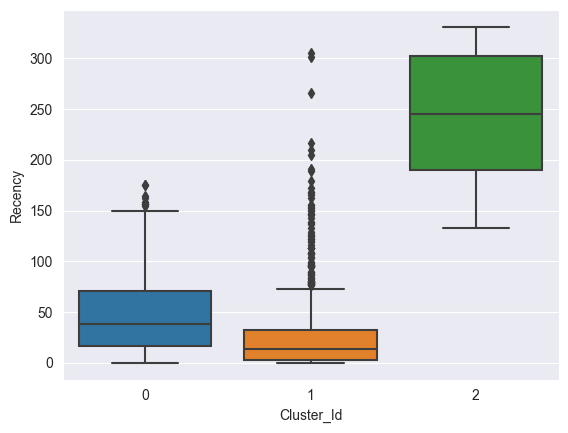

In [64]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)
plt.show()

Inference:

K-Means Clustering with 3 Cluster Ids

- Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster Id 0 are frequent buyers.
- Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

## Refrences

- https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c
- https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
- https://developers.google.com/machine-learning/clustering/clustering-algorithms
- https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering/notebook

In [68]:
import joblib
import os
joblib.dump(kmeans,'kmeans.joblib',compress=0)
print(f"Kmeans Model dump : {np.round(os.path.getsize('kmeans.joblib') / 1024 / 1024, 2) } MB")

Kmeans Model dump : 0.02 MB
